# **REGRESIÓN NO-LINEAL**

In [25]:
install.packages("MASS")
install.packages("caret")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [26]:
library("MASS")
library(tidyverse)
library(caret)
library(ggplot2)
library(splines)
library(mgcv)

En este notebook, examinaremos las estructuras de datos en las que la relación entre las variables no es lineal y crearemos su modelamiento. Utilizaremos los siguientes métodos:

*   Regresión Lineal
*   Regresión Polinómica
*   Transformación logarítmica
*   Regresión Spline
*   Modelos aditivos generalizados

Realizaremos nuestro análisis utilizando el conjunto de datos «Boston» en el paquete «MASS» de R. En primer lugar, llamemos a nuestro conjunto de datos:

In [27]:
data("Boston")
summary(Boston)

      crim                zn             indus            chas        
 Min.   : 0.00632   Min.   :  0.00   Min.   : 0.46   Min.   :0.00000  
 1st Qu.: 0.08205   1st Qu.:  0.00   1st Qu.: 5.19   1st Qu.:0.00000  
 Median : 0.25651   Median :  0.00   Median : 9.69   Median :0.00000  
 Mean   : 3.61352   Mean   : 11.36   Mean   :11.14   Mean   :0.06917  
 3rd Qu.: 3.67708   3rd Qu.: 12.50   3rd Qu.:18.10   3rd Qu.:0.00000  
 Max.   :88.97620   Max.   :100.00   Max.   :27.74   Max.   :1.00000  
      nox               rm             age              dis        
 Min.   :0.3850   Min.   :3.561   Min.   :  2.90   Min.   : 1.130  
 1st Qu.:0.4490   1st Qu.:5.886   1st Qu.: 45.02   1st Qu.: 2.100  
 Median :0.5380   Median :6.208   Median : 77.50   Median : 3.207  
 Mean   :0.5547   Mean   :6.285   Mean   : 68.57   Mean   : 3.795  
 3rd Qu.:0.6240   3rd Qu.:6.623   3rd Qu.: 94.08   3rd Qu.: 5.188  
 Max.   :0.8710   Max.   :8.780   Max.   :100.00   Max.   :12.127  
      rad              tax 

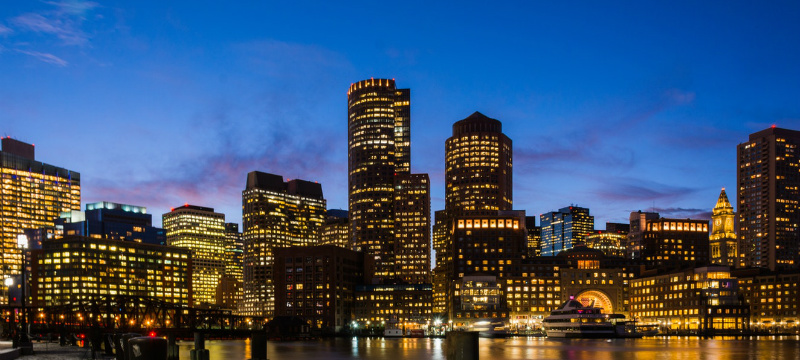

**The Boston Housing Dataset**

The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

*   CRIM - per capita crime rate by town
*   ZN - proportion of residential land zoned for lots over 25,000 sq.ft
*   INDUS - proportion of non-retail business acres per town
*   CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
*   NOX - nitric oxides concentration (parts per 10 million)
*   RM - average number of rooms per dwelling
*   AGE - proportion of owner-occupied units built prior to 1940
*   DIS - weighted distances to five Boston employment centres
*   RAD - index of accessibility to radial highways
*   TAX - full-value property-tax rate per 10,000 dollars
*   PTRATIO - pupil-teacher ratio by town
*   B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
*   LSTAT - % lower status of the population
*   MEDV - Median value of owner-occupied homes in $1000's

Examinemos la relación entre las variables «medv» y «lstat» en este conjunto de datos. Aquí, la variable «lstat» es el porcentaje del estatus bajo de la población y la variable «medv» indica el valor mediano de las casas:

*   variable dependiente-> medv
*   variable independiente-> lstat

Veamos la relación entre estas dos variables:

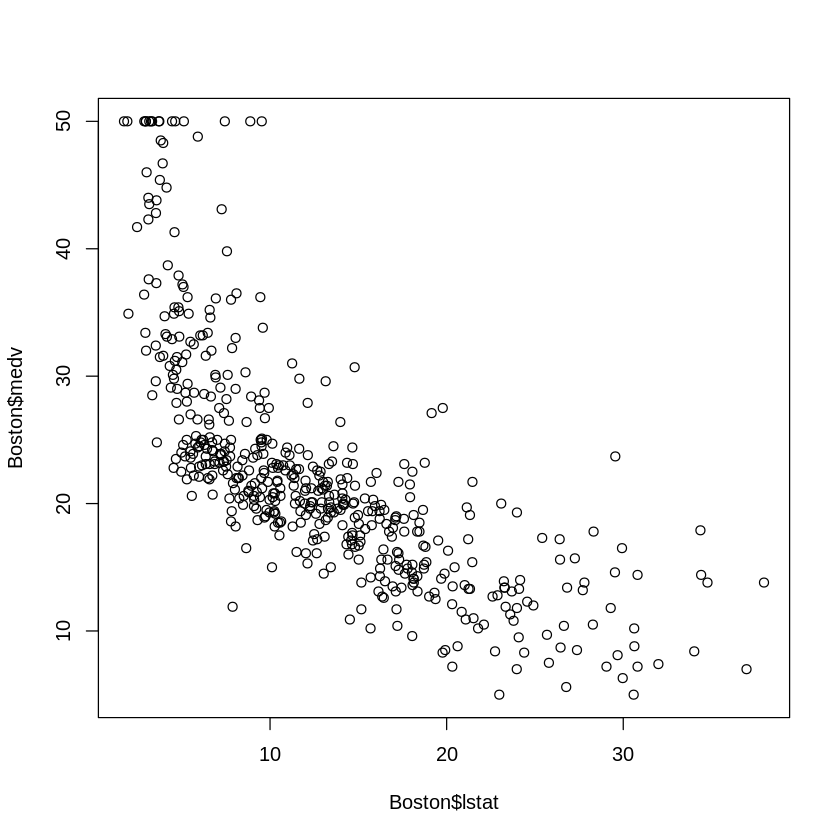

In [28]:
plot(Boston$lstat,Boston$medv)

Ahora podemos empezar nuestro análisis. En primer lugar, vamos a separar nuestro conjunto de datos como el 80% del conjunto de datos de entrenamiento y el 20% del conjunto de datos de prueba:

In [29]:
set.seed(123)
training.samples<-Boston$medv %>%
   createDataPartition(p=0.8,list=FALSE)
train.data<-Boston[training.samples, ]
test.data<-Boston[-training.samples, ]

##1. Regresión Lineal

Modelemos la relación entre variables con una regresión lineal simple y examinemos el RMSE y el coeficiente de determinación:

In [30]:
model<-lm(medv~lstat,data=train.data)
predictions<-model %>% predict(test.data)
data.frame(
  RMSE=RMSE(predictions,test.data$medv),
  R2=R2(predictions,test.data$medv)
)

RMSE,R2
<dbl>,<dbl>
6.503817,0.513163


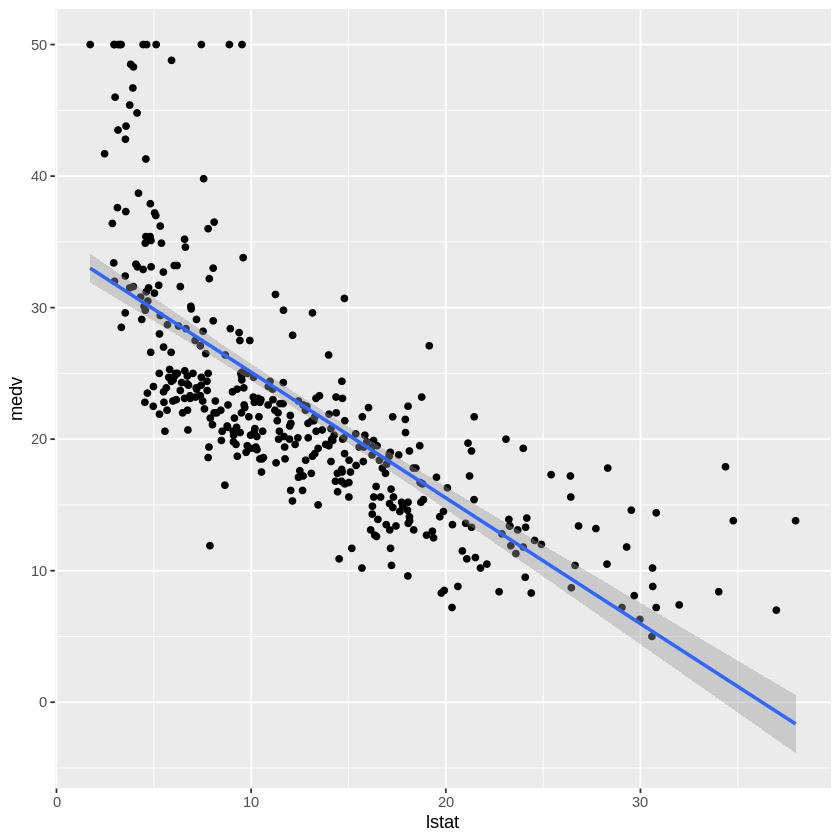

In [31]:
ggplot(train.data, aes(lstat,medv))+
  geom_point()+
  stat_smooth(method=lm, formula=y~x)

Así, modelamos la relación entre variables con regresión lineal simple. Sin embargo, al observar la relación, se ve que utilizar la regresión lineal para este conjunto de datos no es una elección correcta. Usaremos los métodos no lineales, los cuales son derivados del modelo de regresión lineal

##2. Regresión Polinómica

La regresión polinómica se obtiene tomando los grados de la variable independiente. Lo importante aquí es hasta qué grado debe tomarse. Por ejemplo; A continuación se muestra el modelo de regresión lineal para generar una regresión polinómica de 2º grado:

medv=bo + b1 * lstat + b2 * lstat²

Modelemos nuestro conjunto de datos con una regresión polinómica de 2º orden y veamos el resultado resumido:

In [32]:
model<-lm(medv~poly(lstat,2),data=train.data)
summary(model)


Call:
lm(formula = medv ~ poly(lstat, 2), data = train.data)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.3654  -3.8250  -0.6439   2.2733  25.2922 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)       22.5106     0.2727   82.56   <2e-16 ***
poly(lstat, 2)1 -137.2577     5.5006  -24.95   <2e-16 ***
poly(lstat, 2)2   55.3383     5.5006   10.06   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.501 on 404 degrees of freedom
Multiple R-squared:  0.6418,	Adjusted R-squared:   0.64 
F-statistic: 361.9 on 2 and 404 DF,  p-value: < 2.2e-16


Cuando observamos el resultado, vemos que las variables creadas son significativas. Sin embargo, como hemos dicho, deberíamos intentar obtener resultados más fiables aumentando el grado. En este caso, creemos un modelo según el 6º grado y observemos los resultados:

In [33]:
model<-lm(medv~poly(lstat,6),data=train.data)
summary(model)


Call:
lm(formula = medv ~ poly(lstat, 6), data = train.data)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.1962  -3.1527  -0.7655   2.0404  26.7661 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)       22.5106     0.2572  87.533  < 2e-16 ***
poly(lstat, 6)1 -137.2577     5.1881 -26.456  < 2e-16 ***
poly(lstat, 6)2   55.3383     5.1881  10.666  < 2e-16 ***
poly(lstat, 6)3  -24.4801     5.1881  -4.718 3.29e-06 ***
poly(lstat, 6)4   22.9043     5.1881   4.415 1.30e-05 ***
poly(lstat, 6)5  -15.3276     5.1881  -2.954  0.00332 ** 
poly(lstat, 6)6    9.9068     5.1881   1.910  0.05691 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.188 on 400 degrees of freedom
Multiple R-squared:  0.6845,	Adjusted R-squared:  0.6798 
F-statistic: 144.6 on 6 and 400 DF,  p-value: < 2.2e-16


Si observamos el resultado, podemos decir que tiene sentido para los 5 primeros grados. Vemos que el 6º grado es significativo. En este caso, podemos crear un modelo para los 5 primeros grados e interpretar los resultados.

In [34]:
model<-lm(medv~poly(lstat,5),data=train.data)
predictions<-model %>% predict(test.data)
data.frame(
  RMSE=RMSE(predictions,test.data$medv),
  R2=R2(predictions,test.data$medv)
)

RMSE,R2
<dbl>,<dbl>
5.270374,0.6829474


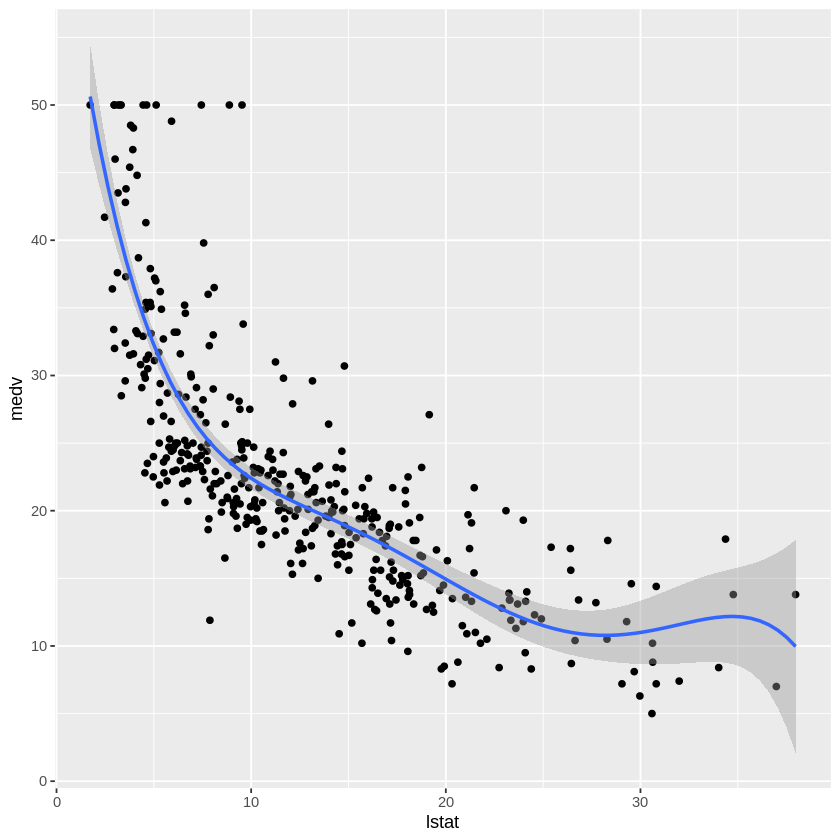

In [35]:
ggplot(train.data, aes(lstat,medv))+
  geom_point()+
  stat_smooth(method=lm,formula=y~poly(x,5))

##3. Transformación Logarítimica

La relación entre variables puede modelizarse aplicando una transformación logarítmica a la variable independiente:

In [36]:
model<-lm(medv~log(lstat),data=train.data)
predictions<-model %>% predict(test.data)
data.frame(
  RMSE=RMSE(predictions,test.data$medv),
  R2=R2(predictions,test.data$medv)
)

RMSE,R2
<dbl>,<dbl>
5.467124,0.6570091


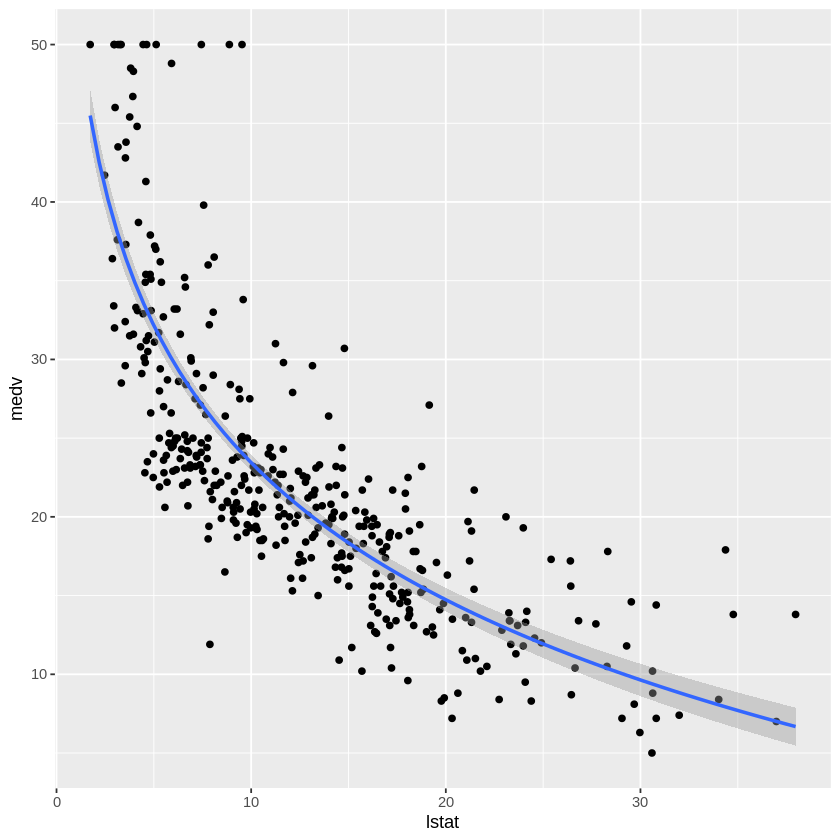

In [37]:
ggplot(train.data, aes(lstat,medv))+
  geom_point()+
  stat_smooth(method=lm,formula=y~log(x))

##4. Regresión SPLINE

Otra forma de tratar las relaciones no lineales es la regresión spline. Aquí, como en la regresión polinómica, el modelo se crea tomando grados. Además, se obtienen los valores de los nudos (knots) y se puede crear la línea de regresión combinando adecuadamente los nudos con el grado especificado. En la regresión spline, se suele establecer un modelo con un 3er grado. Ahora, vamos a comprobar los resultados aplicando este método al conjunto de datos de entrenamiento:

In [38]:
knots<-quantile(train.data$lstat,p=c(0.10,0.50,0.90))
model<-lm(medv~bs(lstat, knots=knots),data=train.data)
predictions<-model %>% predict(test.data)
data.frame(
  RMSE=RMSE(predictions,test.data$medv),
  R2=R2(predictions,test.data$medv)
)

RMSE,R2
<dbl>,<dbl>
5.255264,0.6839899


Aquí se utiliza la función «cuantil» para determinar los nudos. Se observa que se utiliza un total de 3 nudos diferentes. Los 3 nodos se determinan con los cuantiles (cuantiles) 0,1, 0,5 y 0,9 del conjunto de datos. Sin embargo, si se desea, se pueden cambiar los valores de los nodos. Estos valores de cuantiles parecen dar mejores resultados en este conjunto de datos.

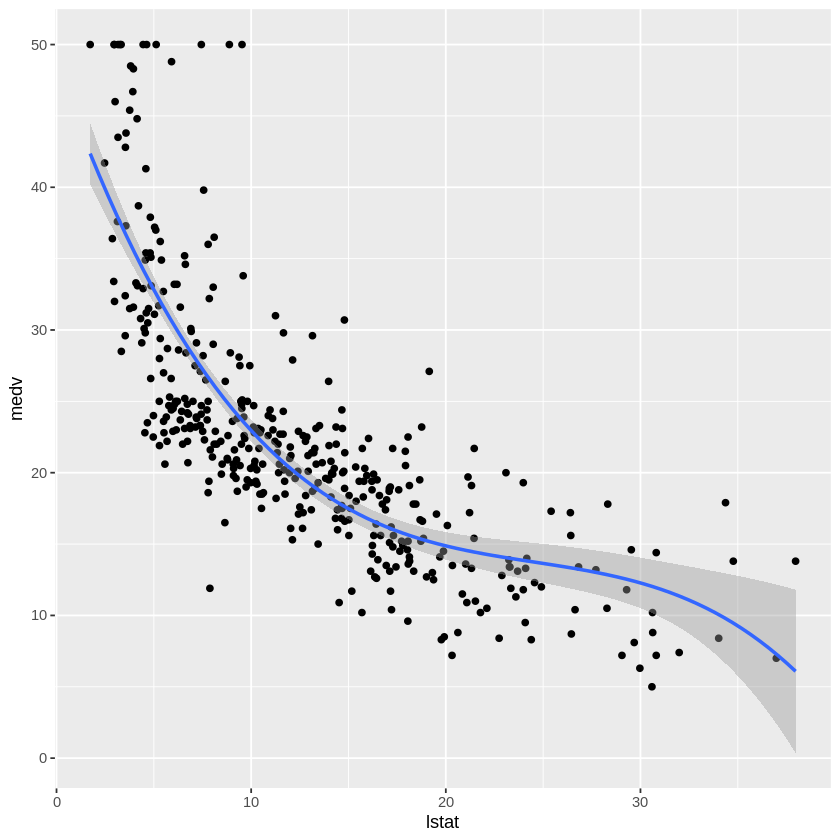

In [39]:
ggplot(train.data, aes(lstat,medv))+
  geom_point()+
  stat_smooth(method=lm,formula=y~splines::bs(x,df=3))

##5. Modelos Aditivos Generalizados

En la regresión polinómica, se determinan los grados, y en la regresión spline, se determinan los nUdos y se crean los modelos. En los modelos aditivos generalizados, no ocurre lo mismo. La estimación de los datos puede obtenerse automáticamente. Para los modelos aditivos generalizados, debe utilizarse la función «gam» en R:

https://www.stat.cmu.edu/~ryantibs/advmethods/notes/smoothspline.pdf

In [42]:
model<-gam(medv~ s(lstat),data=train.data)
predictions<-model %>% predict(test.data)
data.frame(
  RMSE=RMSE(predictions,test.data$medv),
  R2=R2(predictions,test.data$medv)
)

RMSE,R2
<dbl>,<dbl>
5.318856,0.6760512


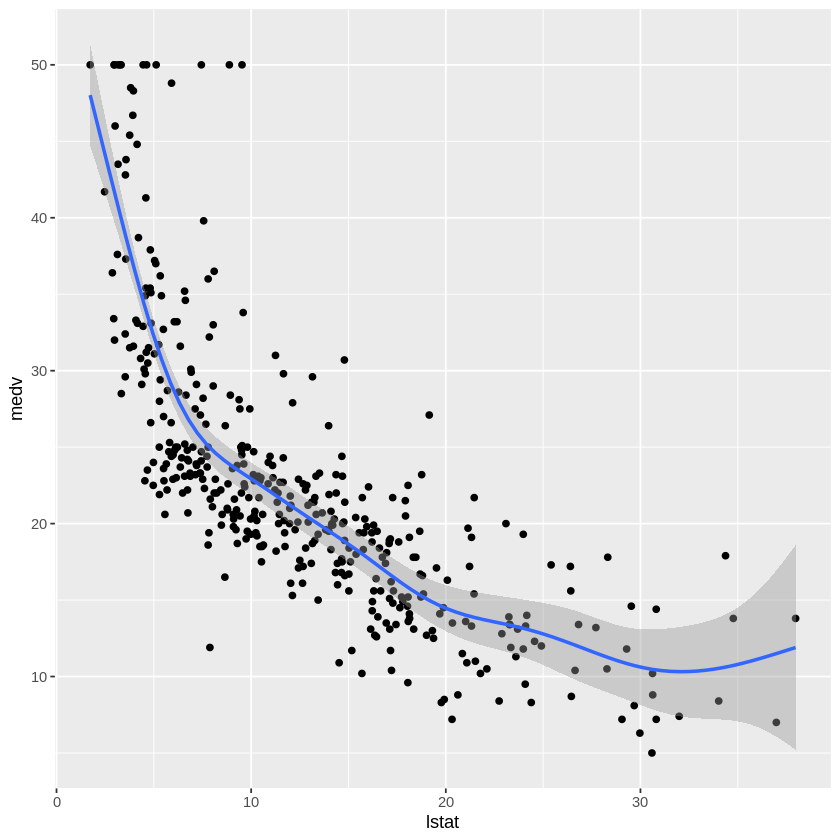

In [24]:
ggplot(train.data, aes(lstat,medv))+
  geom_point()+
  stat_smooth(method=gam,formula=y~s(x))

## CONCLUSIÓN

Hemos analizado métodos alternativos que pueden utilizarse para modelizar relaciones no lineales y los hemos comparado en función de los criterios RMSE y coeficiente de determinación. Como resultado, podemos decir que la regresión polinómica, la regresión spline y los modelos aditivos generalizados pueden preferirse para este conjunto de datos.